In [1]:
import os
import json
import pandas as pd
import random

In [2]:
train_q_file = "../../data/CLEVR_v1/data/CLEVR_train_questions.json"

In [3]:
with open(train_q_file) as f:
    train_questions = json.load(f)

In [4]:
info = train_questions['info']

In [5]:
questions = train_questions['questions']

In [6]:
questions_dict = {}
for q in questions:
    questions_dict[q['question_index']] = q

In [7]:
def get_questions_with_word(word):
    word_questions = set()
    for k,v in questions_dict.items():
        if word in v['question']:
            word_questions.add(k)
    return word_questions

def get_total_word_count_and_data(subsampled_questions_dict):
    total_word_count = 0
    data = []
    for k,q in subsampled_questions_dict.items():
        line = q['question']
        line = line.strip('?').lower()
        line_as_list = line.split(" ")
        data += line_as_list
        total_word_count += len(line_as_list)
    return data, total_word_count

def get_token_counts(data):
    word_set = {"and", "or", "more", "fewer", "behind", "front", "same"}
    token_count_dict = {"and": 0, "or": 0, "more": 0, "fewer": 0, "behind": 0, "in front": 0, "same": 0}
    prev_word = ""
    for word in data:
        if word in word_set:
            if word == "front":
                if prev_word == "in":
                    token_count_dict["in front"] += 1
            else:
                token_count_dict[word] += 1
        prev_word = word
    return token_count_dict

def get_answers(questions):
    answers = {}
    for q in questions:
        ans = questions_dict[q]["answer"]
        if ans in answers:
            answers[ans] += 1
        else:
            answers[ans] = 1
    return answers
    

## AND and OR

In [8]:
and_questions = get_questions_with_word(" and ")

In [9]:
or_questions = get_questions_with_word(" or ")

In [10]:
and_answers = get_answers(and_questions)

In [11]:
and_answers

{'rubber': 3898,
 'yellow': 980,
 'yes': 20673,
 'no': 21463,
 'cube': 2660,
 'green': 955,
 'large': 3843,
 'small': 3936,
 '1': 2887,
 'cyan': 933,
 '2': 1120,
 'cylinder': 2590,
 '0': 3084,
 'sphere': 2661,
 'metal': 3986,
 'brown': 975,
 'blue': 1008,
 'red': 1038,
 'gray': 966,
 'purple': 1009,
 '5': 105,
 '6': 52,
 '3': 426,
 '4': 217,
 '7': 28,
 '8': 13}

In [12]:
or_answers = get_answers(or_questions)

In [13]:
or_answers

{'1': 20657,
 '2': 16445,
 '0': 11665,
 '3': 8517,
 '4': 3333,
 '6': 651,
 '7': 288,
 '5': 1423,
 '8': 149,
 '9': 74,
 '10': 12}

## MORE and FEWER

In [14]:
more_questions = get_questions_with_word(" more ")

In [15]:
fewer_questions = get_questions_with_word(" fewer ")

In [16]:
more_answers = get_answers(more_questions)

In [17]:
more_answers

{'yes': 5549, 'no': 6021}

In [18]:
fewer_answers = get_answers(fewer_questions)

In [19]:
fewer_answers

{'no': 6011, 'yes': 5840}

In [20]:
from IPython.display import Image

In [21]:
#for q in more_questions:
#    ans = questions_dict[q]["answer"]
#    if ans == "no":
#        que = questions_dict[q]["question"]
#        image = questions_dict[q]["image_filename"]
#        print(que, image)

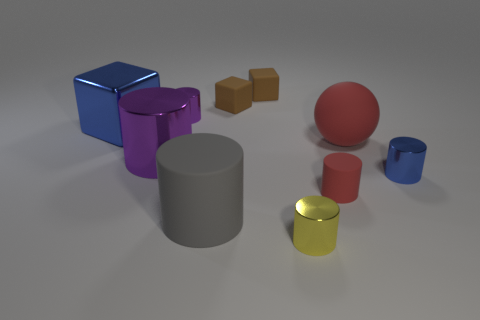

In [22]:
Image(filename='../../data/CLEVR_v1/images/train/CLEVR_train_009846.png')

Are there more cylinders that are behind the large purple shiny cylinder than tiny yellow cylinders? CLEVR_train_009846.png
Image(filename='../../data/CLEVR_v1/images/train/CLEVR_train_009846.png')
Are there more big cyan blocks in front of the large cyan thing than blue cylinders? CLEVR_train_022954.png
Image(filename='../../data/CLEVR_v1/images/train/CLEVR_train_022954.png') 
Are there more balls that are in front of the brown rubber object than tiny cyan things?
Image(filename='../../data/CLEVR_v1/images/train/CLEVR_train_068857.png') 

## BEHIND and FRONT

In [24]:
behind_questions = get_questions_with_word(" behind ")

In [25]:
front_questions = get_questions_with_word(" front ")

In [26]:
behind_answers = get_answers(behind_questions)

In [27]:
behind_answers

{'1': 7346,
 'no': 28707,
 '0': 5891,
 'yes': 27491,
 'metal': 7161,
 'sphere': 4746,
 'gray': 1740,
 'cube': 4822,
 'large': 7052,
 'cyan': 1776,
 'purple': 1766,
 'cylinder': 4821,
 '2': 3847,
 '3': 2383,
 'small': 7032,
 'brown': 1768,
 '4': 1052,
 'yellow': 1802,
 'green': 1774,
 'rubber': 7216,
 'blue': 1818,
 'red': 1799,
 '6': 234,
 '7': 110,
 '5': 471,
 '8': 69,
 '9': 27,
 '10': 2}

In [28]:
front_answers = get_answers(front_questions)

In [29]:
front_answers

{'cube': 4710,
 'metal': 7198,
 'no': 28563,
 'sphere': 4842,
 'yes': 27748,
 '1': 7435,
 'green': 1772,
 'rubber': 7193,
 'yellow': 1812,
 'blue': 1815,
 'small': 7170,
 'red': 1849,
 'cylinder': 4710,
 '0': 5844,
 '3': 2311,
 'brown': 1840,
 '6': 233,
 '2': 3786,
 'large': 7210,
 'cyan': 1736,
 'purple': 1865,
 'gray': 1755,
 '4': 1058,
 '5': 459,
 '8': 75,
 '7': 90,
 '10': 1,
 '9': 30}

### Look at questions

In [30]:
#for q in and_questions:
#    ans = questions_dict[q]["answer"]
#    if ans in ["yes", "no"]:
#        print(questions_dict[q]["question"] )

In [31]:
#for q in or_questions:
#    que = questions_dict[q]["question"]
#    print(questions_dict[q]["question"])

# ANSWER to probes

In [32]:
probes_dir = "../../data/CLEVR_PROBES/"

In [33]:
probes = {}
for file in os.scandir(probes_dir):
    if file.path.endswith(".json"):
        with open(file.path) as f:
            probe = json.load(f)
            probes[file.name] = probe

In [34]:
def get_probe_answers(questions):
    answers = {}
    for q in questions:
        ans = q['answer']
        if ans in answers:
            answers[ans] += 1
        else:
            answers[ans] = 1
    return answers

### AND and OR

In [35]:
orp_questions = probes['OR2_val_questions.json']['questions']

In [36]:
andp_questions = probes['AND2_val_questions.json']['questions']

In [37]:
orp_answers = get_probe_answers(orp_questions)

In [38]:
orp_answers

{'no': 6454, 'yes (inclusive) / no (exclusive)': 795, 'yes': 8351}

In [39]:
andp_answers = get_probe_answers(andp_questions)

In [40]:
andp_answers

{'no': 9362, 'yes': 6238}

### MORE and FEWER

In [41]:
morep_questions = probes['MORE_val_questions.json']['questions']

In [42]:
fewerp_questions = probes['LESS_val_questions.json']['questions']

In [43]:
morep_answers = get_probe_answers(morep_questions)

In [44]:
morep_answers

{'yes': 6154, 'no': 18266}

In [45]:
fewerp_answers = get_probe_answers(fewerp_questions)

In [46]:
fewerp_answers

{'no': 18768, 'yes': 5652}

In [47]:
def helper_two_object_counts(objects, params):
    o1_count = o2_count = 0
    for i, object in enumerate(objects):
        if params[0] in (object['size'], object['color'], object['material'], "") and params[1] in (object['shape'], 'thing'):
            o1_count += 1
        elif params[2] in (object['size'], object['color'], object['material'], "") and params[3] in (object['shape'], 'thing'):
            o2_count += 1
    return o1_count, o2_count

def get_num_from_scene(item, probetype):
    image_id = item["image_index"]
    question = item["question"]
    objects = g_scenes_dict[image_id]
    params = []
    if probetype == "probeMORE":
        # template : "Are there more of the [P1] [S1]s than the [P2] [S2]s?"
        question = question.replace('Are there more of the ', '')
        question = question.replace('than the ', '')
        question = question.replace('s ', ' ')
        params = question[:-2].split(' ')
    else:
        # template : "Are there fewer of the [P1] [S1] than the [P2] [S2]?"
        question = question.replace('Are there fewer of the ', '')
        question = question.replace('than the ', '')
        question = question.replace('s ', ' ')
        params = question[:-2].split(' ')
    o1_count, o2_count = helper_two_object_counts(objects, params)
    item["obj1_count"] = o1_count
    item["obj2_count"] = o2_count
    return(item)

def get_performance_by_num_diff(answer_data, probetype):
    with_counts = answer_data.apply(lambda x: get_num_from_scene(x, probetype), axis=1)
    with_counts['num_diff'] = with_counts.obj1_count - with_counts.obj2_count
    
    all_res = with_counts.drop(['question', 'image_index', 'index', 'obj1_count', 'obj2_count'], axis=1)
    diff_res =  pd.DataFrame(all_res.value_counts(['answer', 'num_diff']))
    diff_res = diff_res.reset_index()
    diff_res.columns = ['answer', 'num_diff', 'counts']

    return diff_res


In [48]:
scene_file = "../../data/CLEVR_v1/scenes/CLEVR_val_scenes.json"
g_scenes_dict = dict()
with open(scene_file) as image_info:
    scenes = json.load(image_info)
for scene in scenes['scenes']:
    g_scenes_dict[scene["image_index"]] = scene["objects"]

In [49]:
more_file = "../../data/preds/2022-02-14_experiment1_e25_4mac_newSAME_seed0/probeMORE-0_0-Answers-2022-02-14_experiment1_e25_4mac_newSAME_seed0.csv"
fewer_file = "../../data/preds/2022-02-14_experiment1_e25_4mac_newSAME_seed0/probeLESS-0_0-Answers-2022-02-14_experiment1_e25_4mac_newSAME_seed0.csv"

In [50]:
answer_data = pd.read_csv(more_file)
diff_res_more = get_performance_by_num_diff(answer_data, "probeMORE")

In [51]:
diff_res_more

,answer,num_diff,counts
0,no,0,12495
1,yes,1,3725
2,no,-1,3649
3,yes,2,1358
4,no,-2,1278
5,yes,3,600
6,no,-3,509
7,yes,4,287
8,no,-4,217
9,yes,5,128


In [52]:
answer_data = pd.read_csv(fewer_file)
diff_res_fewer = get_performance_by_num_diff(answer_data, "probeLESS")

In [53]:
diff_res_fewer

,answer,num_diff,counts
0,no,0,12532
1,no,1,3879
2,yes,-1,3576
3,no,2,1311
4,yes,-2,1225
5,no,3,609
6,yes,-3,514
7,no,4,269
8,yes,-4,225
9,no,5,113


### BEHIND and FRONT

In [54]:
behindp_questions = probes['BEHIND_val_questions.json']['questions']

In [55]:
frontp_questions = probes['FRONT_val_questions.json']['questions']

In [56]:
behindp_answers = get_probe_answers(behindp_questions)

In [57]:
behindp_answers

{'no': 12321, 'yes': 12059}

In [58]:
frontp_answers = get_probe_answers(frontp_questions)

In [59]:
frontp_answers

{'yes': 12209, 'no': 12171}

In [60]:
behind_file = "../../data/results/2022-02-14_experiment1_e25_4mac_newSAME_seed0/probeBEHIND_res_by_round_dist.csv"
front_file = "../../data/results/2022-02-14_experiment1_e25_4mac_newSAME_seed0/probeFRONT_res_by_round_dist.csv"

In [61]:
behind_data = pd.read_csv(behind_file)

In [62]:
behind_answers = behind_data[behind_data['epoch'] == 0][behind_data['batchNum'] == 0].drop(['prediction'], axis=1)

<ipython-input-62-09880c95f648>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  behind_answers = behind_data[behind_data['epoch'] == 0][behind_data['batchNum'] == 0].drop(['prediction'], axis=1)


In [63]:
behind_answers.groupby(['answer','dist'])['counts'].sum()

answer  dist
no      1        426
        2       2548
        3       2837
        4       2818
        5       2308
        6       1171
        7        203
        8         10
yes     1        419
        2       2438
        3       2742
        4       2773
        5       2340
        6       1133
        7        203
        8         11
Name: counts, dtype: int64

In [64]:
front_data = pd.read_csv(front_file)

In [65]:
front_answers = front_data[front_data['epoch'] == 0][front_data['batchNum'] == 0].drop(['prediction'], axis=1)

<ipython-input-65-887b8affec27>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  front_answers = front_data[front_data['epoch'] == 0][front_data['batchNum'] == 0].drop(['prediction'], axis=1)


In [66]:
front_answers.groupby(['answer','dist'])['counts'].sum()

answer  dist
no      1        430
        2       2573
        3       2792
        4       2769
        5       2288
        6       1095
        7        211
        8         13
yes     1        388
        2       2512
        3       2768
        4       2811
        5       2364
        6       1159
        7        198
        8          9
Name: counts, dtype: int64